In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
import numpy as np

In [380]:
data = pd.read_csv('GOAT.csv', sep=";")
data

,Player,Career Games,Games per Season,NBA Championships,Conference Championships,MVP Awards,All-Star Appearances,Points per Game,Rebounds per Game,Assists per Game,Field Goal Percentage,Win Shares,Player Efficiency Rating,Seasons Played
0,Michael Jordan,1072,82,6,6,5,14,30.1,6.2,5.3,49.7%,171.3,27.1,15
1,LeBron James,1083,79,4,4,4,17,27.1,7.4,7.4,50.4%,219.2,27.5,18
2,Larry Bird,897,79,3,5,3,12,24.3,10.0,6.3,49.6%,123.0,27.1,13
3,Kareem Abdul-Jabbar,1560,71,6,5,6,19,24.6,11.2,3.6,55.9%,184.0,24.6,20
4,Kobe Bryant,1046,80,5,5,1,18,25.0,5.2,4.7,44.7%,157.0,24.0,20
5,Magic Johnson,906,79,5,4,3,12,19.5,7.2,11.2,52.0%,123.3,24.1,13
6,Bill Russell,964,73,11,5,5,12,15.1,22.5,4.3,44.0%,124.0,22.5,13
7,Wilt Chamberlain,1045,63,2,2,4,13,30.1,22.9,4.4,50.4%,168.3,27.1,14
8,Shaquille O'Neal,1207,71,4,4,1,15,23.7,10.9,2.5,58.2%,157.0,27.2,19
9,Tim Duncan,1071,79,5,4,2,15,19.0,10.8,3.0,50.6%,194.0,25.5,19


Text(0.5, 1.0, 'NBA TITLES')

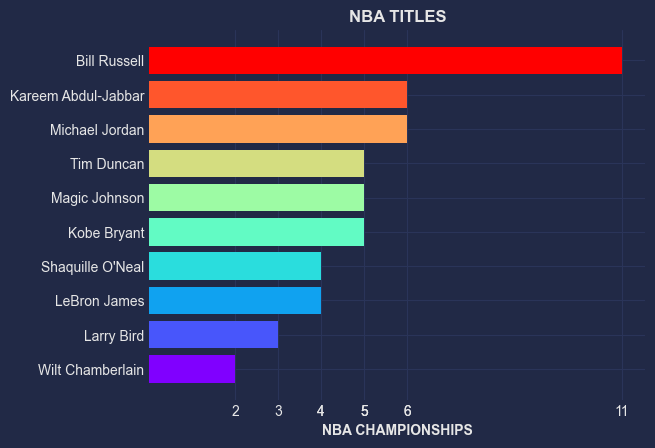

In [381]:
data_titles = data[['Player', 'NBA Championships']]
#diverging_colors = sns.color_palette("RdBu", 10)
plt.style.use("cyberpunk")
data_titles = data_titles.sort_values(['NBA Championships'], ascending=True)
x = data_titles['NBA Championships']
y = data_titles['Player']
colors = plt.cm.rainbow(np.linspace(0, 1, len(y)))

plt.barh(y, x, color=colors)
plt.xticks(x)
plt.xlabel('NBA CHAMPIONSHIPS', fontweight="bold")
plt.ylabel('PLAYER', fontweight="bold", visible=False)
plt.title('NBA TITLES', fontweight="bold")

Text(0.5, 1.0, 'POINTS PER GAME')

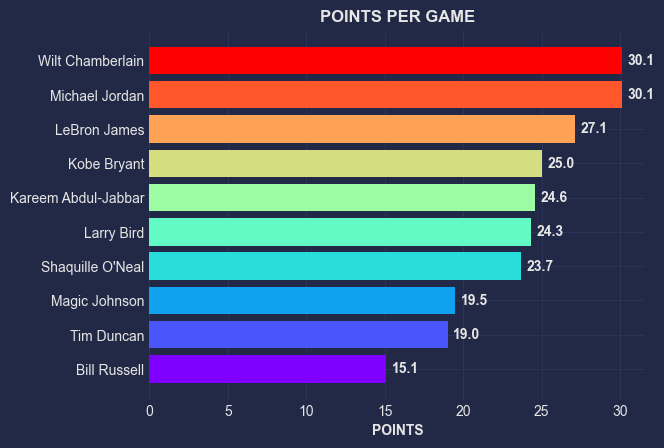

In [382]:
data_points = data[['Player', 'Points per Game']]
#diverging_colors = sns.color_palette("RdBu", 10)
plt.style.use("cyberpunk")
data_points = data_points.sort_values(['Points per Game'], ascending=True)
x = data_points['Points per Game']
y = data_points['Player']

colors = plt.cm.rainbow(np.linspace(0, 1, len(y)))
ind = np.arange(10)  

fig, ax = plt.subplots()
f = ax.barh(y, x, color=colors)
ax.set_label(y)
#ax.set_xticks(ind,labels=x)
ax.bar_label(f, fmt='%.1f',padding=4, fontweight="bold")

plt.xlabel('POINTS', fontweight="bold")
plt.ylabel('PLAYER', fontweight="bold", visible=False)
plt.title('POINTS PER GAME', fontweight="bold")


C:\Users\admin\AppData\Local\Temp\ipykernel_4180\2924475418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_awr['sum'] = data_awr['NBA Championships']+data_awr['Conference Championships']+data_awr['MVP Awards']


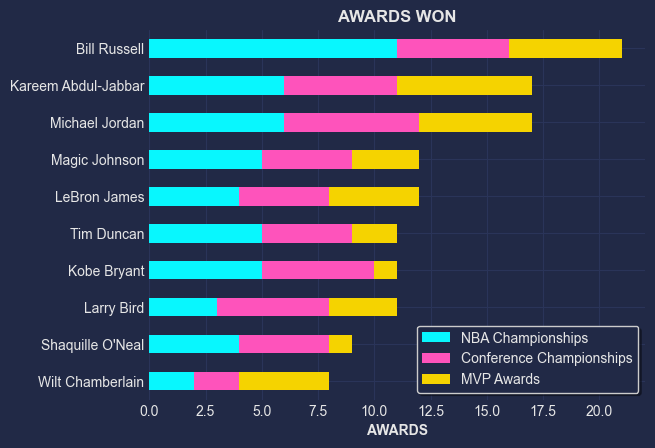

In [383]:
data_awr = data[['Player', 'NBA Championships','Conference Championships','MVP Awards']]
data_awr['sum'] = data_awr['NBA Championships']+data_awr['Conference Championships']+data_awr['MVP Awards']
data_awr = data_awr.sort_values(['sum'], ascending=True)
del data_awr['sum']
plt.style.use("cyberpunk")
data_awr.plot(stacked=True, kind='barh', x='Player')
plt.xlabel('AWARDS', fontweight="bold")
plt.ylabel('PLAYER', fontweight="bold", visible=False)
plt.title('AWARDS WON', fontweight="bold")
plt.legend(loc='best', shadow=True, frameon=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4180\444782121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_PR['sum'] = data_PR['Points per Game']+data_PR['Rebounds per Game']+data_PR['Assists per Game']


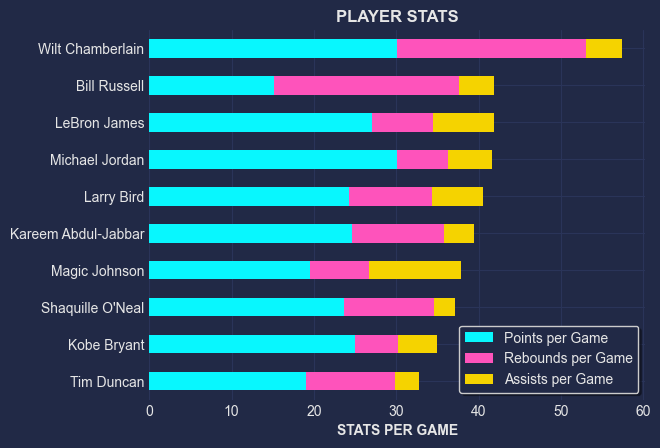

In [384]:
data_PR = data[['Player', 'Points per Game', 'Rebounds per Game', 'Assists per Game']]
data_PR['sum'] = data_PR['Points per Game']+data_PR['Rebounds per Game']+data_PR['Assists per Game']
data_PR = data_PR.sort_values(['sum'], ascending=True)
del data_PR['sum']
plt.style.use("cyberpunk")
data_PR.plot(stacked=True, kind='barh', x='Player')
plt.xlabel('STATS PER GAME', fontweight="bold")
plt.ylabel('PLAYER', fontweight="bold", visible=False)
plt.title('PLAYER STATS', fontweight="bold")
plt.legend(loc='best', shadow=True, frameon=True)

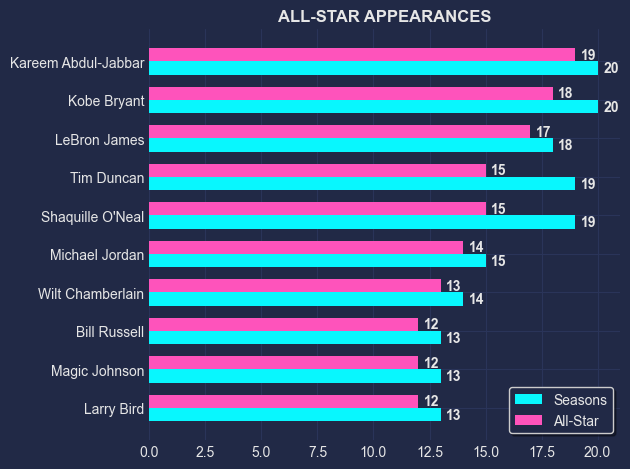

In [385]:
data_EF = data[['Player','All-Star Appearances','Seasons Played']]
data_EF = data_EF.sort_values(['All-Star Appearances'], ascending=True)
x1=data_EF['Player']
y1=data_EF['All-Star Appearances']
y2=data_EF['Seasons Played']
x = np.arange(len(x1))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, y2, width, label='Seasons')
rects2 = ax.barh(x + width/2, y1, width, label='All-Star')

ax.set_title('ALL-STAR APPEARANCES', fontweight="bold")
ax.set_yticks(x, x1)
ax.bar_label(rects1, padding=4, fontweight="bold")
ax.bar_label(rects2, padding=4, fontweight="bold")

fig.tight_layout()
plt.legend(loc='best', shadow=True, frameon=True)


Text(0.5, 1.0, 'PLAYER IMPACT')

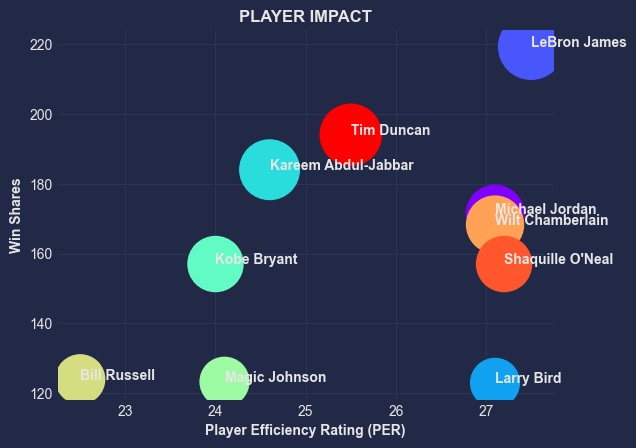

In [386]:
data_PER = data[['Player','Win Shares','Player Efficiency Rating']]
data_PR.reset_index(inplace=True, drop=True)
players = data_PER['Player']
PER = data_PER['Player Efficiency Rating']
Win_Shares = data_PER['Win Shares']
area=(Win_Shares*10)
nCols = len(players) 
colors = plt.cm.rainbow(np.linspace(0, 1, len(PER)))
plt.scatter(PER, Win_Shares,c=colors,s=area)

for i, player in enumerate(players):
    plt.annotate(player, (PER[i], Win_Shares[i]), fontweight="bold")

# Add labels for the x and y axis
plt.xlabel('Player Efficiency Rating (PER)', fontweight="bold")
plt.ylabel('Win Shares', fontweight="bold")
plt.title('PLAYER IMPACT', fontweight="bold")

Text(0.5, 1.0, 'POINTS VS. REBOUNDS')

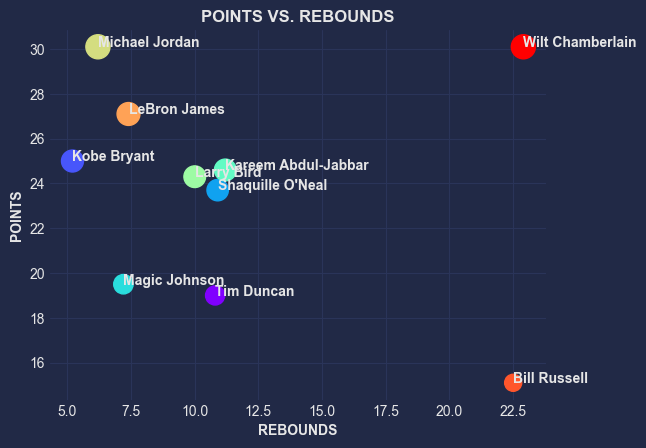

In [387]:
data_PR.reset_index(inplace=True, drop=True)
players = data_PR['Player']
AST = data_PR['Assists per Game']
REB = data_PR['Rebounds per Game']
PTS = data_PR['Points per Game']
area=(PTS*10)
nCols = len(players) 
colors = plt.cm.rainbow(np.linspace(0, 1, len(REB)))
plt.scatter(REB,PTS,c=colors,s=area)

for i, player in enumerate(players):
    plt.annotate(player, (REB[i], PTS[i]), fontweight="bold")

# Add labels for the x and y axis
plt.xlabel('REBOUNDS', fontweight="bold")
plt.ylabel('POINTS', fontweight="bold")
plt.title('POINTS VS. REBOUNDS', fontweight="bold")

Text(0.5, 1.0, 'POINTS VS. ASSISTS')

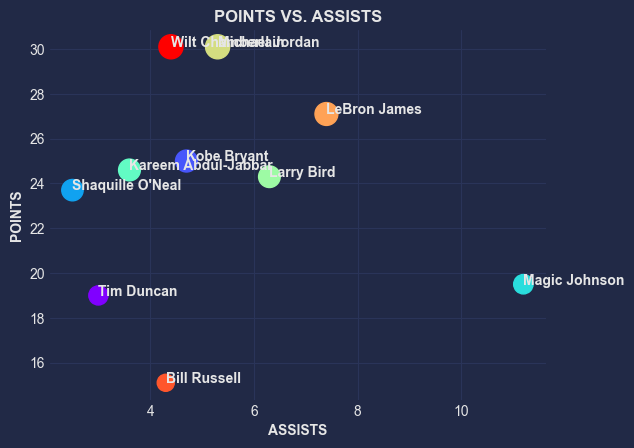

In [388]:
data_PR.reset_index(inplace=True, drop=True)
players = data_PR['Player']
AST = data_PR['Assists per Game']
REB = data_PR['Rebounds per Game']
PTS = data_PR['Points per Game']
area=(PTS*10)
nCols = len(players) 
colors = plt.cm.rainbow(np.linspace(0, 1, len(AST)))
plt.scatter(data_PR['Assists per Game'],data_PR['Points per Game'],c=colors,s=area)

for i, player in enumerate(players):
    plt.annotate(player, (AST[i], PTS[i]), fontweight="bold", ha='left')

# Add labels for the x and y axis
plt.xlabel('ASSISTS', fontweight="bold")
plt.ylabel('POINTS', fontweight="bold")
plt.title('POINTS VS. ASSISTS', fontweight="bold")

C:\Users\admin\AppData\Local\Temp\ipykernel_4180\1861197583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cor['Stats'] = data_cor['Assists per Game'] + data_cor['Rebounds per Game'] + data_cor['Points per Game']


<AxesSubplot: >

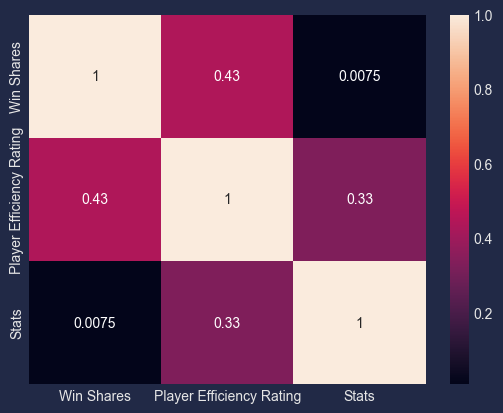

In [389]:
data_cor = data[['Win Shares','Player Efficiency Rating','Points per Game', 'Rebounds per Game', 'Assists per Game']]
data_cor['Stats'] = data_cor['Assists per Game'] + data_cor['Rebounds per Game'] + data_cor['Points per Game']
data_cor = data_cor.drop(columns=['Assists per Game','Rebounds per Game','Points per Game'])


CORRELATION = data_cor[['Win Shares','Player Efficiency Rating','Stats']].corr()
sns.heatmap(CORRELATION, annot=True)

In [390]:
from nba_api.stats.static import players
from nba_api.stats.static import teams 

pd.set_option('display.max_columns',250)

In [391]:
player_dict = players.get_players()
players = pd.DataFrame(player_dict)
index_p = players[ (players['is_active'] == False)].index
players.drop(index=index_p,inplace=True)
print("Total of players:",players.shape[0])
players.head()

Total of players: 582


,id,full_name,first_name,last_name,is_active
10,1630173,Precious Achiuwa,Precious,Achiuwa,True
22,203500,Steven Adams,Steven,Adams,True
24,1628389,Bam Adebayo,Bam,Adebayo,True
29,1630534,Ochai Agbaji,Ochai,Agbaji,True
41,1630583,Santi Aldama,Santi,Aldama,True


In [392]:
xname = 'Luka Doncic'
id = players.id[players.full_name == xname].to_list()[0]
display(players[players.full_name == xname])

,id,full_name,first_name,last_name,is_active
1087,1629029,Luka Doncic,Luka,Doncic,True


In [393]:
from nba_api.stats.endpoints import playercareerstats
#lebronId = players.id[players.full_name == 'LeBron James'].to_list()[0]
stats_career = playercareerstats.PlayerCareerStats(player_id = id)
stats_career = stats_career.get_data_frames()[0]
#stats_career = stats_career[['GP','PTS','REB','AST']]
#ast = stats_career['AST'].cumsum()
#reb = stats_career['REB'].cumsum()
#pts = stats_career['PTS'].cumsum()
#gp = stats_career['GP'].sum()

#print(ast,reb,pts,gp)

stats_career = stats_career.sum(axis=0)
stats_career = pd.DataFrame(stats_career)
stats_career = stats_career.T
stats_career.insert(0,'player','Luka Doncic')
stats_career = stats_career.drop(columns=['TEAM_ID','LEAGUE_ID','TEAM_ABBREVIATION','PLAYER_AGE','SEASON_ID'])
stats_career

,player,PLAYER_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Luka Doncic,8145145,312,312,10683.0,2915,6265,2.331,864,2549,1.696,1864,2535,3.672,317,2364,2681,2494,349,135,1257,717,8558


In [394]:
xname = 'Trae Young'
id = players.id[players.full_name == xname].to_list()[0]
#display(players[players.full_name == xname])
nstats = playercareerstats.PlayerCareerStats(player_id = id)
nstats = nstats.get_data_frames()[0]

nstats = nstats.sum(axis=0)
nstats = pd.DataFrame(nstats)
nstats = nstats.T
nstats.insert(0,'player', xname)
nstats = nstats.drop(columns=['TEAM_ID','LEAGUE_ID','TEAM_ABBREVIATION','PLAYER_AGE','SEASON_ID'])
m = pd.concat([stats_career, nstats])
m

,player,PLAYER_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Luka Doncic,8145145,312,312,10683.0,2915,6265,2.331,864,2549,1.696,1864,2535,3.672,317,2364,2681,2494,349,135,1257,717,8558
0,Trae Young,8145135,330,330,11175.0,2696,6152,2.184,839,2390,1.737,2191,2504,4.366,221,1014,1235,3052,310,50,1370,560,8422


In [471]:
names_players = ['Joel Embiid','Giannis Antetokounmpo','Damian Lillard','Shai Gilgeous-Alexander','Jayson Tatum','LeBron James']
chapelo = len(names_players)
chapelo = [*range(1, chapelo, 1)]
#user = ('play'+str(chapelo[0]))
#globals()[user] = 40

40
<class 'int'>


In [472]:
for name in names_players:
    id = players.id[players.full_name == name].to_list()[0]
    print(id,name)
    nstats = playercareerstats.PlayerCareerStats(player_id = id)
    nstats = nstats.get_data_frames()[0]
    nstats = nstats.sum(axis=0)
    nstats = pd.DataFrame(nstats)
    nstats = nstats.T
    nstats.insert(0,'player', name, allow_duplicates=False)
    nstats = nstats.drop(columns=['TEAM_ID','LEAGUE_ID','TEAM_ABBREVIATION','PLAYER_AGE','SEASON_ID'])
    pdlist = [stats_career, nstats]
    m = pd.concat([stats_career, nstats], ignore_index=True)
    display(m)

203954 Joel Embiid


,player,PLAYER_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Luka Doncic,8145145,312,312,10683.0,2915,6265,2.331,864,2549,1.696,1864,2535,3.672,317,2364,2681,2494,349,135,1257,717,8558
1,Joel Embiid,1427678,371,371,11741.0,3278,6607,3.461,438,1289,2.412,2978,3649,5.691,843,3326,4169,1254,334,609,1263,1148,9972


203507 Giannis Antetokounmpo


,player,PLAYER_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Luka Doncic,8145145,312,312,10683.0,2915,6265,2.331,864,2549,1.696,1864,2535,3.672,317,2364,2681,2494,349,135,1257,717,8558
1,Giannis Antetokounmpo,2035070,701,636,22853.0,5707,10660,5.256,484,1687,2.768,3881,5464,7.095,1226,5475,6701,3262,800,891,2062,2123,15779


203081 Damian Lillard


,player,PLAYER_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Luka Doncic,8145145,312,312,10683.0,2915,6265,2.331,864,2549,1.696,1864,2535,3.672,317,2364,2681,2494,349,135,1257,717,8558
1,Damian Lillard,2233891,755,755,27426.0,6133,13975,4.814,2321,6234,4.065,4289,4793,9.807,453,2705,3158,5049,719,234,2133,1455,18876


1628983 Shai Gilgeous-Alexander


,player,PLAYER_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Luka Doncic,8145145,312,312,10683.0,2915,6265,2.331,864,2549,1.696,1864,2535,3.672,317,2364,2681,2494,349,135,1257,717,8558
1,Shai Gilgeous-Alexander,8144915,294,285,9533.0,2108,4376,2.419,345,990,1.785,1442,1717,4.138,203,1121,1324,1329,359,216,681,640,6003


1628369 Jayson Tatum


,player,PLAYER_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Luka Doncic,8145145,312,312,10683.0,2915,6265,2.331,864,2549,1.696,1864,2535,3.672,317,2364,2681,2494,349,135,1257,717,8558
1,Jayson Tatum,9770214,419,419,14201.0,3260,7133,2.748,1004,2660,2.302,1763,2078,5.078,376,2508,2884,1349,467,295,934,887,9287


2544 LeBron James


,player,PLAYER_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Luka Doncic,8145145,312,312,10683.0,2915,6265,2.331,864,2549,1.696,1864,2535,3.672,317,2364,2681,2494,349,135,1257,717,8558
1,LeBron James,50880,1410,1409,53741.0,14053,27829,10.14,2237,6494,6.883,8047,10949,14.654,1652,8931,10583,10354,2179,1065,4926,2588,38390


In [450]:
for name in names_players:
    id = players.id[players.full_name == name].to_list()[0]
    #display(players[players.full_name == xname])
    #display(players[players.full_name == name])
    nstats = playercareerstats.PlayerCareerStats(player_id = id)
    nstats = nstats.get_data_frames()[0]

    nstats = nstats.sum(axis=0)
    nstats = pd.DataFrame(nstats)
    nstats = nstats.T
    nstats.insert(0,'player', name, allow_duplicates=False)
    nstats = nstats.drop(columns=['TEAM_ID','LEAGUE_ID','TEAM_ABBREVIATION','PLAYER_AGE','SEASON_ID'])
    #m = pd.concat([stats_career, nstats])
    
    m = pd.concat([stats_career, nstats])

#m = pd.concat([stats_career, nstats])
m

,player,PLAYER_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Luka Doncic,8145145,312,312,10683.0,2915,6265,2.331,864,2549,1.696,1864,2535,3.672,317,2364,2681,2494,349,135,1257,717,8558
0,LeBron James,50880,1410,1409,53741.0,14053,27829,10.14,2237,6494,6.883,8047,10949,14.654,1652,8931,10583,10354,2179,1065,4926,2588,38390


In [405]:
#for name in names_players:
#id = players.id[players.full_name == xname].to_list()[0]
#display(players[players.full_name == xname])
nstats = playercareerstats.PlayerCareerStats(player_id = id)
nstats = nstats.get_data_frames()[0]

nstats = nstats.sum(axis=0)
nstats = pd.DataFrame(nstats)
nstats = nstats.T
nstats.insert(0,'player', xname)
nstats = nstats.drop(columns=['TEAM_ID','LEAGUE_ID','TEAM_ABBREVIATION','PLAYER_AGE','SEASON_ID'])
#m = pd.concat([stats_career, nstats])
m = nstats.append(stats_career)
m.reset_index()
m

C:\Users\admin\AppData\Local\Temp\ipykernel_4180\806233350.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m = nstats.append(stats_career)


,player,PLAYER_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Trae Young,50880,1410,1409,53741.0,14053,27829,10.14,2237,6494,6.883,8047,10949,14.654,1652,8931,10583,10354,2179,1065,4926,2588,38390
0,Luka Doncic,8145145,312,312,10683.0,2915,6265,2.331,864,2549,1.696,1864,2535,3.672,317,2364,2681,2494,349,135,1257,717,8558
